In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [4]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [5]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [6]:
from sklearn import cluster

In [7]:
Ester_1 = "Now it came to pass in the days of Ahasuerus, (this is Ahasuerus which reigned, from India even to Ethiopia, over an hundred and seven and twenty provinces:)That in those days, when the king Ahasuerus sat on the throne of his kingdom, which was in Shushan the palace,In the third year of his reign, he made a feast to all his princes and his servants; the power of Persia and Media, the nobles and princes of the provinces, being before him:When he showed the riches of his glorious kingdom and the honor of his excellent majesty many days, even an hundred and fourscore days.And when these days were expired, the king made a feast to all the people that were present in Shushan the palace, both to great and small, seven days, in the court of the garden of the king' palace;Where were white, green, and blue, hangings, fastened with cords of fine linen and purple to silver rings and pillars of marble: the beds were of gold and silver, on a pavement of red, and blue, and white, and black, marble.And they gave them drink in vessels of gold, (the vessels being diverse one from another,) and royal wine in abundance, according to the state of the king.And the drinking was according to the law; none did compel: for so the king had appointed to all the officers of his house, that they should do according to every man' pleasure.Also Vashti the queen made a feast for the women in the royal house which belonged to king Ahasuerus.On the seventh day, when the heart of the king was merry with wine, he commanded Mehuman, Biztha, Harbona, Bigtha, and Abagtha, Zethar, and Carcas, the seven chamberlains that served in the presence of Ahasuerus the king,To bring Vashti the queen before the king with the crown royal, to show the people and the princes her beauty: for she was fair to look on.But the queen Vashti refused to come at the king' commandment by his chamberlains: therefore was the king very wroth, and his anger burned in him.Then the king said to the wise men, which knew the times, (for so was the king' manner toward all that knew law and judgment:And the next to him was Carshena, Shethar, Admatha, Tarshish, Meres, Marsena, and Memucan, the seven princes of Persia and Media, which saw the king' face, and which sat the first in the kingdom;)What shall we do to the queen Vashti according to law, because she has not performed the commandment of the king Ahasuerus by the chamberlains?And Memucan answered before the king and the princes, Vashti the queen has not done wrong to the king only, but also to all the princes, and to all the people that are in all the provinces of the king Ahasuerus.For this deed of the queen shall come abroad to all women, so that they shall despise their husbands in their eyes, when it shall be reported, The king Ahasuerus commanded Vashti the queen to be brought in before him, but she came not.Likewise shall the ladies of Persia and Media say this day to all the king' princes, which have heard of the deed of the queen. Thus shall there arise too much contempt and wrath.If it please the king, let there go a royal commandment from him, and let it be written among the laws of the Persians and the Medes, that it be not altered, That Vashti come no more before king Ahasuerus; and let the king give her royal estate to another that is better than she.And when the king' decree which he shall make shall be published throughout all his empire, (for it is great,) all the wives shall give to their husbands honor, both to great and small.And the saying pleased the king and the princes; and the king did according to the word of Memucan:For he sent letters into all the king' provinces, into every province according to the writing thereof, and to every people after their language, that every man should bear rule in his own house, and that it should be published according to the language of every people.".lower()

In [8]:
Ester_2 = "After these things, when the wrath of king Ahasuerus was appeased, he remembered Vashti, and what she had done, and what was decreed against her.Then said the king' servants that ministered to him, Let there be fair young virgins sought for the king:And let the king appoint officers in all the provinces of his kingdom, that they may gather together all the fair young virgins to Shushan the palace, to the house of the women, to the custody of Hege the king' chamberlain, keeper of the women; and let their things for purification be given them:And let the maiden which pleases the king be queen instead of Vashti. And the thing pleased the king; and he did so.Now in Shushan the palace there was a certain Jew, whose name was Mordecai, the son of Jair, the son of Shimei, the son of Kish, a Benjamite;Who had been carried away from Jerusalem with the captivity which had been carried away with Jeconiah king of Judah, whom Nebuchadnezzar the king of Babylon had carried away.And he brought up Hadassah, that is, Esther, his uncle' daughter: for she had neither father nor mother, and the maid was fair and beautiful; whom Mordecai, when her father and mother were dead, took for his own daughter.So it came to pass, when the king' commandment and his decree was heard, and when many maidens were gathered together to Shushan the palace, to the custody of Hegai, that Esther was brought also to the king' house, to the custody of Hegai, keeper of the women.And the maiden pleased him, and she obtained kindness of him; and he speedily gave her her things for purification, with such things as belonged to her, and seven maidens, which were meet to be given her, out of the king' house: and he preferred her and her maids to the best place of the house of the women.Esther had not showed her people nor her kindred: for Mordecai had charged her that she should not show it.And Mordecai walked every day before the court of the women' house, to know how Esther did, and what should become of her.Now when every maid' turn was come to go in to king Ahasuerus, after that she had been twelve months, according to the manner of the women, (for so were the days of their purifications accomplished, to wit, six months with oil of myrrh, and six months with sweet odors, and with other things for the purifying of the women;)Then thus came every maiden to the king; whatever she desired was given her to go with her out of the house of the women to the king' house.In the evening she went, and on the morrow she returned into the second house of the women, to the custody of Shaashgaz, the king' chamberlain, which kept the concubines: she came in to the king no more, except the king delighted in her, and that she were called by name.Now when the turn of Esther, the daughter of Abihail the uncle of Mordecai, who had taken her for his daughter, was come to go in to the king, she required nothing but what Hegai the king' chamberlain, the keeper of the women, appointed. And Esther obtained favor in the sight of all them that looked on her.So Esther was taken to king Ahasuerus into his house royal in the tenth month, which is the month Tebeth, in the seventh year of his reign.And the king loved Esther above all the women, and she obtained grace and favor in his sight more than all the virgins; so that he set the royal crown on her head, and made her queen instead of Vashti.Then the king made a great feast to all his princes and his servants, even Esther' feast; and he made a release to the provinces, and gave gifts, according to the state of the king.And when the virgins were gathered together the second time, then Mordecai sat in the king' gate.Esther had not yet showed her kindred nor her people; as Mordecai had charged her: for Esther did the commandment of Mordecai, like as when she was brought up with him.In those days, while Mordecai sat in the king' gate, two of the king' chamberlains, Bigthan and Teresh, of those which kept the door, were wroth, and sought to lay hands on the king Ahasuerus.And the thing was known to Mordecai, who told it to Esther the queen; and Esther certified the king thereof in Mordecai' name.And when inquisition was made of the matter, it was found out; therefore they were both hanged on a tree: and it was written in the book of the chronicles before the king.".lower()

In [9]:
Ester_3 = "After these things did king Ahasuerus promote Haman the son of Hammedatha the Agagite, and advanced him, and set his seat above all the princes that were with him.And all the king' servants, that were in the king' gate, bowed, and reverenced Haman: for the king had so commanded concerning him. But Mordecai bowed not, nor did him reverence.Then the king' servants, which were in the king' gate, said to Mordecai, Why transgress you the king' commandment?Now it came to pass, when they spoke daily to him, and he listened not to them, that they told Haman, to see whether Mordecai' matters would stand: for he had told them that he was a Jew.And when Haman saw that Mordecai bowed not, nor did him reverence, then was Haman full of wrath.And he thought scorn to lay hands on Mordecai alone; for they had showed him the people of Mordecai: why Haman sought to destroy all the Jews that were throughout the whole kingdom of Ahasuerus, even the people of Mordecai.In the first month, that is, the month Nisan, in the twelfth year of king Ahasuerus, they cast Pur, that is, the lot, before Haman from day to day, and from month to month, to the twelfth month, that is, the month Adar.And Haman said to king Ahasuerus, There is a certain people scattered abroad and dispersed among the people in all the provinces of your kingdom; and their laws are diverse from all people; neither keep they the king' laws: therefore it is not for the king' profit to suffer them.If it please the king, let it be written that they may be destroyed: and I will pay ten thousand talents of silver to the hands of those that have the charge of the business, to bring it into the king' treasuries.And the king took his ring from his hand, and gave it to Haman the son of Hammedatha the Agagite, the Jews'enemy.And the king said to Haman, The silver is given to you, the people also, to do with them as it seems good to you.Then were the king' scribes called on the thirteenth day of the first month, and there was written according to all that Haman had commanded to the king' lieutenants, and to the governors that were over every province, and to the rulers of every people of every province according to the writing thereof, and to every people after their language; in the name of king Ahasuerus was it written, and sealed with the king' ring.And the letters were sent by posts into all the king' provinces, to destroy, to kill, and to cause to perish, all Jews, both young and old, little children and women, in one day, even on the thirteenth day of the twelfth month, which is the month Adar, and to take the spoil of them for a prey.The copy of the writing for a commandment to be given in every province was published to all people, that they should be ready against that day.The posts went out, being hastened by the king' commandment, and the decree was given in Shushan the palace. And the king and Haman sat down to drink; but the city Shushan was perplexed.".lower()

In [10]:
Ester_4 = "When Mordecai perceived all that was done, Mordecai rent his clothes, and put on sackcloth with ashes, and went out into the middle of the city, and cried with a loud and a bitter cry;And came even before the king' gate: for none might enter into the king' gate clothed with sackcloth.And in every province, wherever the king' commandment and his decree came, there was great mourning among the Jews, and fasting, and weeping, and wailing; and many lay in sackcloth and ashes.So Esther' maids and her chamberlains came and told it her. Then was the queen exceedingly grieved; and she sent raiment to clothe Mordecai, and to take away his sackcloth from him: but he received it not.Then called Esther for Hatach, one of the king' chamberlains, whom he had appointed to attend on her, and gave him a commandment to Mordecai, to know what it was, and why it was.So Hatach went forth to Mordecai to the street of the city, which was before the king' gate.And Mordecai told him of all that had happened to him, and of the sum of the money that Haman had promised to pay to the king' treasuries for the Jews, to destroy them.Also he gave him the copy of the writing of the decree that was given at Shushan to destroy them, to show it to Esther, and to declare it to her, and to charge her that she should go in to the king, to make supplication to him, and to make request before him for her people.And Hatach came and told Esther the words of Mordecai.Again Esther spoke to Hatach, and gave him commandment to Mordecai;All the king' servants, and the people of the king' provinces, do know, that whoever, whether man or women, shall come to the king into the inner court, who is not called, there is one law of his to put him to death, except such to whom the king shall hold out the golden scepter, that he may live: but I have not been called to come in to the king these thirty days.And they told to Mordecai Esther' words.Then Mordecai commanded to answer Esther, Think not with yourself that you shall escape in the king' house, more than all the Jews.For if you altogether hold your peace at this time, then shall there enlargement and deliverance arise to the Jews from another place; but you and your father' house shall be destroyed: and who knows whether you are come to the kingdom for such a time as this?Then Esther bade them return Mordecai this answer,Go, gather together all the Jews that are present in Shushan, and fast you for me, and neither eat nor drink three days, night or day: I also and my maidens will fast likewise; and so will I go in to the king, which is not according to the law: and if I perish, I perish.So Mordecai went his way, and did according to all that Esther had commanded him.".lower()

In [11]:
Ester_5 = "Now it came to pass on the third day, that Esther put on her royal apparel, and stood in the inner court of the king' house, over against the king' house: and the king sat on his royal throne in the royal house, over against the gate of the house.And it was so, when the king saw Esther the queen standing in the court, that she obtained favor in his sight: and the king held out to Esther the golden scepter that was in his hand. So Esther drew near, and touched the top of the scepter.Then said the king to her, What will you, queen Esther? and what is your request? it shall be even given you to the half of the kingdom.And Esther answered, If it seem good to the king, let the king and Haman come this day to the banquet that I have prepared for him.Then the king said, Cause Haman to make haste, that he may do as Esther has said. So the king and Haman came to the banquet that Esther had prepared.And the king said to Esther at the banquet of wine, What is your petition? and it shall be granted you: and what is your request? even to the half of the kingdom it shall be performed.Then answered Esther, and said, My petition and my request is;If I have found favor in the sight of the king, and if it please the king to grant my petition, and to perform my request, let the king and Haman come to the banquet that I shall prepare for them, and I will do to morrow as the king has said.Then went Haman forth that day joyful and with a glad heart: but when Haman saw Mordecai in the king' gate, that he stood not up, nor moved for him, he was full of indignation against Mordecai.Nevertheless Haman refrained himself: and when he came home, he sent and called for his friends, and Zeresh his wife.And Haman told them of the glory of his riches, and the multitude of his children, and all the things wherein the king had promoted him, and how he had advanced him above the princes and servants of the king.Haman said moreover, Yes, Esther the queen did let no man come in with the king to the banquet that she had prepared but myself; and to morrow am I invited to her also with the king.Yet all this avails me nothing, so long as I see Mordecai the Jew sitting at the king' gate.Then said Zeresh his wife and all his friends to him, Let a gallows be made of fifty cubits high, and to morrow speak you to the king that Mordecai may be hanged thereon: then go you in merrily with the king to the banquet. And the thing pleased Haman; and he caused the gallows to be made.".lower()

In [12]:
Ester_6 = "On that night could not the king sleep, and he commanded to bring the book of records of the chronicles; and they were read before the king.And it was found written, that Mordecai had told of Bigthana and Teresh, two of the king' chamberlains, the keepers of the door, who sought to lay hand on the king Ahasuerus.And the king said, What honor and dignity has been done to Mordecai for this? Then said the king' servants that ministered to him, There is nothing done for him.And the king said, Who is in the court? Now Haman was come into the outward court of the king' house, to speak to the king to hang Mordecai on the gallows that he had prepared for him.And the king' servants said to him, Behold, Haman stands in the court. And the king said, Let him come in.So Haman came in. And the king said to him, What shall be done to the man whom the king delights to honor? Now Haman thought in his heart, To whom would the king delight to do honor more than to myself?And Haman answered the king, For the man whom the king delights to honor,Let the royal apparel be brought which the king uses to wear, and the horse that the king rides on, and the crown royal which is set on his head:And let this apparel and horse be delivered to the hand of one of the king' most noble princes, that they may array the man with whom the king delights to honor, and bring him on horseback through the street of the city, and proclaim before him, Thus shall it be done to the man whom the king delights to honor.Then the king said to Haman, Make haste, and take the apparel and the horse, as you have said, and do even so to Mordecai the Jew, that sits at the king' gate: let nothing fail of all that you have spoken.Then took Haman the apparel and the horse, and arrayed Mordecai, and brought him on horseback through the street of the city, and proclaimed before him, Thus shall it be done to the man whom the king delights to honor.And Mordecai came again to the king' gate. But Haman hurried to his house mourning, and having his head covered.And Haman told Zeresh his wife and all his friends every thing that had befallen him. Then said his wise men and Zeresh his wife to him, If Mordecai be of the seed of the Jews, before whom you have begun to fall, you shall not prevail against him, but shall surely fall before him.And while they were yet talking with him, came the king' chamberlains, and hurried to bring Haman to the banquet that Esther had prepared.".lower()

In [13]:
Ester_7 = "So the king and Haman came to banquet with Esther the queen.And the king said again to Esther on the second day at the banquet of wine, What is your petition, queen Esther? and it shall be granted you: and what is your request? and it shall be performed, even to the half of the kingdom.Then Esther the queen answered and said, If I have found favor in your sight, O king, and if it please the king, let my life be given me at my petition, and my people at my request:For we are sold, I and my people, to be destroyed, to be slain, and to perish. But if we had been sold for slaves and bondwomen, I had held my tongue, although the enemy could not countervail the king' damage.Then the king Ahasuerus answered and said to Esther the queen, Who is he, and where is he, that dared presume in his heart to do so?And Esther said, The adversary and enemy is this wicked Haman. Then Haman was afraid before the king and the queen.And the king arising from the banquet of wine in his wrath went into the palace garden: and Haman stood up to make request for his life to Esther the queen; for he saw that there was evil determined against him by the king.Then the king returned out of the palace garden into the place of the banquet of wine; and Haman was fallen on the bed where on Esther was. Then said the king, Will he force the queen also before me in the house? As the word went out of king' mouth, they covered Haman' face.And Harbonah, one of the chamberlains, said before the king, Behold also, the gallows fifty cubits high, which Haman had made for Mordecai, who spoken good for the king, stands in the house of Haman. Then the king said, Hang him thereon.So they hanged Haman on the gallows that he had prepared for Mordecai. Then was the king' wrath pacified.".lower()

In [14]:
Ester_8 = "On that day did the king Ahasuerus give the house of Haman the Jews'enemy to Esther the queen. And Mordecai came before the king; for Esther had told what he was to her.And the king took off his ring, which he had taken from Haman, and gave it to Mordecai. And Esther set Mordecai over the house of Haman.And Esther spoke yet again before the king, and fell down at his feet, and sought him with tears to put away the mischief of Haman the Agagite, and his device that he had devised against the Jews.Then the king held out the golden scepter toward Esther. So Esther arose, and stood before the king,And said, If it please the king, and if I have favor in his sight, and the thing seem right before the king, and I be pleasing in his eyes, let it be written to reverse the letters devised by Haman the son of Hammedatha the Agagite, which he wrote to destroy the Jews which are in all the king' provinces:For how can I endure to see the evil that shall come to my people? or how can I endure to see the destruction of my kindred?Then the king Ahasuerus said to Esther the queen and to Mordecai the Jew, Behold, I have given Esther the house of Haman, and him they have hanged on the gallows, because he laid his hand on the Jews.Write you also for the Jews, as it likes you, in the king' name, and seal it with the king' ring: for the writing which is written in the king' name, and sealed with the king' ring, may no man reverse.Then were the king' scribes called at that time in the third month, that is, the month Sivan, on the three and twentieth day thereof; and it was written according to all that Mordecai commanded to the Jews, and to the lieutenants, and the deputies and rulers of the provinces which are from India to Ethiopia, an hundred twenty and seven provinces, to every province according to the writing thereof, and to every people after their language, and to the Jews according to their writing, and according to their language.And he wrote in the king Ahasuerus'name, and sealed it with the king' ring, and sent letters by posts on horseback, and riders on mules, camels, and young dromedaries:Wherein the king granted the Jews which were in every city to gather themselves together, and to stand for their life, to destroy, to slay and to cause to perish, all the power of the people and province that would assault them, both little ones and women, and to take the spoil of them for a prey,On one day in all the provinces of king Ahasuerus, namely, on the thirteenth day of the twelfth month, which is the month Adar.The copy of the writing for a commandment to be given in every province was published to all people, and that the Jews should be ready against that day to avenge themselves on their enemies.So the posts that rode on mules and camels went out, being hastened and pressed on by the king' commandment. And the decree was given at Shushan the palace.And Mordecai went out from the presence of the king in royal apparel of blue and white, and with a great crown of gold, and with a garment of fine linen and purple: and the city of Shushan rejoiced and was glad.The Jews had light, and gladness, and joy, and honor.And in every province, and in every city, wherever the king' commandment and his decree came, the Jews had joy and gladness, a feast and a good day. And many of the people of the land became Jews; for the fear of the Jews fell on them.".lower()

In [15]:
Ester_9 = "Now in the twelfth month, that is, the month Adar, on the thirteenth day of the same, when the king' commandment and his decree drew near to be put in execution, in the day that the enemies of the Jews hoped to have power over them, (though it was turned to the contrary, that the Jews had rule over them that hated them;)The Jews gathered themselves together in their cities throughout all the provinces of the king Ahasuerus, to lay hand on such as sought their hurt: and no man could withstand them; for the fear of them fell on all people.And all the rulers of the provinces, and the lieutenants, and the deputies, and officers of the king, helped the Jews; because the fear of Mordecai fell on them.For Mordecai was great in the king' house, and his fame went out throughout all the provinces: for this man Mordecai waxed greater and greater.Thus the Jews smote all their enemies with the stroke of the sword, and slaughter, and destruction, and did what they would to those that hated them.And in Shushan the palace the Jews slew and destroyed five hundred men.And Parshandatha, and Dalphon, and Aspatha,And Poratha, and Adalia, and Aridatha,And Parmashta, and Arisai, and Aridai, and Vajezatha,The ten sons of Haman the son of Hammedatha, the enemy of the Jews, slew they; but on the spoil laid they not their hand.On that day the number of those that were slain in Shushan the palace was brought before the king.And the king said to Esther the queen, The Jews have slain and destroyed five hundred men in Shushan the palace, and the ten sons of Haman; what have they done in the rest of the king' provinces? now what is your petition? and it shall be granted you: or what is your request further? and it shall be done.Then said Esther, If it please the king, let it be granted to the Jews which are in Shushan to do to morrow also according to this day' decree, and let Haman' ten sons be hanged on the gallows.And the king commanded it so to be done: and the decree was given at Shushan; and they hanged Haman' ten sons.For the Jews that were in Shushan gathered themselves together on the fourteenth day also of the month Adar, and slew three hundred men at Shushan; but on the prey they laid not their hand.But the other Jews that were in the king' provinces gathered themselves together, and stood for their lives, and had rest from their enemies, and slew of their foes seventy and five thousand, but they laid not their hands on the prey,On the thirteenth day of the month Adar; and on the fourteenth day of the same rested they, and made it a day of feasting and gladness.But the Jews that were at Shushan assembled together on the thirteenth day thereof, and on the fourteenth thereof; and on the fifteenth day of the same they rested, and made it a day of feasting and gladness.Therefore the Jews of the villages, that dwelled in the unwalled towns, made the fourteenth day of the month Adar a day of gladness and feasting, and a good day, and of sending portions one to another.And Mordecai wrote these things, and sent letters to all the Jews that were in all the provinces of the king Ahasuerus, both near and far,To establish this among them, that they should keep the fourteenth day of the month Adar, and the fifteenth day of the same, yearly,As the days wherein the Jews rested from their enemies, and the month which was turned to them from sorrow to joy, and from mourning into a good day: that they should make them days of feasting and joy, and of sending portions one to another, and gifts to the poor.And the Jews undertook to do as they had begun, and as Mordecai had written to them;Because Haman the son of Hammedatha, the Agagite, the enemy of all the Jews, had devised against the Jews to destroy them, and had cast Pur, that is, the lot, to consume them, and to destroy them;But when Esther came before the king, he commanded by letters that his wicked device, which he devised against the Jews, should return on his own head, and that he and his sons should be hanged on the gallows.Why they called these days Purim after the name of Pur. Therefore for all the words of this letter, and of that which they had seen concerning this matter, and which had come to them,The Jews ordained, and took on them, and on their seed, and on all such as joined themselves to them, so as it should not fail, that they would keep these two days according to their writing, and according to their appointed time every year;And that these days should be remembered and kept throughout every generation, every family, every province, and every city; and that these days of Purim should not fail from among the Jews, nor the memorial of them perish from their seed.Then Esther the queen, the daughter of Abihail, and Mordecai the Jew, wrote with all authority, to confirm this second letter of Purim.And he sent the letters to all the Jews, to the hundred twenty and seven provinces of the kingdom of Ahasuerus, with words of peace and truth,To confirm these days of Purim in their times appointed, according as Mordecai the Jew and Esther the queen had enjoined them, and as they had decreed for themselves and for their seed, the matters of the fastings and their cry.And the decree of Esther confirmed these matters of Purim; and it was written in the book.".lower()

In [16]:
Ester_10 = "And the king Ahasuerus laid a tribute on the land, and on the isles of the sea.And all the acts of his power and of his might, and the declaration of the greatness of Mordecai, whereunto the king advanced him, are they not written in the book of the chronicles of the kings of Media and Persia?For Mordecai the Jew was next to king Ahasuerus, and great among the Jews, and accepted of the multitude of his brothers, seeking the wealth of his people, and speaking peace to all his seed.".lower()

In [124]:
tokens = nltk.word_tokenize(Ester_10)

In [125]:
stop_words = set(stopwords.words('english'))

In [126]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [127]:
print(filtered_sentence1)

['king', 'ahasuerus', 'laid', 'tribute', 'land', ',', 'isles', 'sea.and', 'acts', 'power', 'might', ',', 'declaration', 'greatness', 'mordecai', ',', 'whereunto', 'king', 'advanced', ',', 'written', 'book', 'chronicles', 'kings', 'media', 'persia', '?', 'mordecai', 'jew', 'next', 'king', 'ahasuerus', ',', 'great', 'among', 'jews', ',', 'accepted', 'multitude', 'brothers', ',', 'seeking', 'wealth', 'people', ',', 'speaking', 'peace', 'seed', '.']


In [128]:
data =np.array([["Ester_1", "'came', 'pass', 'days', 'ahasuerus', ',', '(', 'ahasuerus', 'reigned', ',', 'india', 'even', 'ethiopia', ',', 'hundred', 'seven', 'twenty', 'provinces', ':', ')', 'days', ',', 'king', 'ahasuerus', 'sat', 'throne', 'kingdom', ',', 'shushan', 'palace', ',', 'third', 'year', 'reign', ',', 'made', 'feast', 'princes', 'servants', ';', 'power', 'persia', 'media', ',', 'nobles', 'princes', 'provinces', ',', ':', 'showed', 'riches', 'glorious', 'kingdom', 'honor', 'excellent', 'majesty', 'many', 'days', ',', 'even', 'hundred', 'fourscore', 'days.and', 'days', 'expired', ',', 'king', 'made', 'feast', 'people', 'present', 'shushan', 'palace', ',', 'great', 'small', ',', 'seven', 'days', ',', 'court', 'garden', 'king', ', 'palace', ';', 'white', ',', 'green', ',', 'blue', ',', 'hangings', ',', 'fastened', 'cords', 'fine', 'linen', 'purple', 'silver', 'rings', 'pillars', 'marble', ':', 'beds', 'gold', 'silver', ',', 'pavement', 'red', ',', 'blue', ',', 'white', ',', 'black', ',', 'marble.and', 'gave', 'drink', 'vessels', 'gold', ',', '(', 'vessels', 'diverse', 'one', 'another', ',', ')', 'royal', 'wine', 'abundance', ',', 'according', 'state', 'king.and', 'drinking', 'according', 'law', ';', 'none', 'compel', ':', 'king', 'appointed', 'officers', 'house', ',', 'according', 'every', 'man', ', 'pleasure.also', 'vashti', 'queen', 'made', 'feast', 'women', 'royal', 'house', 'belonged', 'king', 'ahasuerus.on', 'seventh', 'day', ',', 'heart', 'king', 'merry', 'wine', ',', 'commanded', 'mehuman', ',', 'biztha', ',', 'harbona', ',', 'bigtha', ',', 'abagtha', ',', 'zethar', ',', 'carcas', ',', 'seven', 'chamberlains', 'served', 'presence', 'ahasuerus', 'king', ',', 'bring', 'vashti', 'queen', 'king', 'crown', 'royal', ',', 'show', 'people', 'princes', 'beauty', ':', 'fair', 'look', 'on.but', 'queen', 'vashti', 'refused', 'come', 'king', ', 'commandment', 'chamberlains', ':', 'therefore', 'king', 'wroth', ',', 'anger', 'burned', 'him.then', 'king', 'said', 'wise', 'men', ',', 'knew', 'times', ',', '(', 'king', ', 'manner', 'toward', 'knew', 'law', 'judgment', ':', 'next', 'carshena', ',', 'shethar', ',', 'admatha', ',', 'tarshish', ',', 'meres', ',', 'marsena', ',', 'memucan', ',', 'seven', 'princes', 'persia', 'media', ',', 'saw', 'king', ', 'face', ',', 'sat', 'first', 'kingdom', ';', ')', 'shall', 'queen', 'vashti', 'according', 'law', ',', 'performed', 'commandment', 'king', 'ahasuerus', 'chamberlains', '?', 'memucan', 'answered', 'king', 'princes', ',', 'vashti', 'queen', 'done', 'wrong', 'king', ',', 'also', 'princes', ',', 'people', 'provinces', 'king', 'ahasuerus.for', 'deed', 'queen', 'shall', 'come', 'abroad', 'women', ',', 'shall', 'despise', 'husbands', 'eyes', ',', 'shall', 'reported', ',', 'king', 'ahasuerus', 'commanded', 'vashti', 'queen', 'brought', ',', 'came', 'not.likewise', 'shall', 'ladies', 'persia', 'media', 'say', 'day', 'king', ', 'princes', ',', 'heard', 'deed', 'queen', '.', 'thus', 'shall', 'arise', 'much', 'contempt', 'wrath.if', 'please', 'king', ',', 'let', 'go', 'royal', 'commandment', ',', 'let', 'written', 'among', 'laws', 'persians', 'medes', ',', 'altered', ',', 'vashti', 'come', 'king', 'ahasuerus', ';', 'let', 'king', 'give', 'royal', 'estate', 'another', 'better', 'she.and', 'king', ', 'decree', 'shall', 'make', 'shall', 'published', 'throughout', 'empire', ',', '(', 'great', ',', ')', 'wives', 'shall', 'give', 'husbands', 'honor', ',', 'great', 'small.and', 'saying', 'pleased', 'king', 'princes', ';', 'king', 'according', 'word', 'memucan', ':', 'sent', 'letters', 'king', ', 'provinces', ',', 'every', 'province', 'according', 'writing', 'thereof', ',', 'every', 'people', 'language', ',', 'every', 'man', 'bear', 'rule', 'house', ',', 'published', 'according', 'language', 'every', 'people', '.'"],
               ["Ester_2", "'things', ',', 'wrath', 'king', 'ahasuerus', 'appeased', ',', 'remembered', 'vashti', ',', 'done', ',', 'decreed', 'her.then', 'said', 'king', ', 'servants', 'ministered', ',', 'let', 'fair', 'young', 'virgins', 'sought', 'king', ':', 'let', 'king', 'appoint', 'officers', 'provinces', 'kingdom', ',', 'may', 'gather', 'together', 'fair', 'young', 'virgins', 'shushan', 'palace', ',', 'house', 'women', ',', 'custody', 'hege', 'king', ', 'chamberlain', ',', 'keeper', 'women', ';', 'let', 'things', 'purification', 'given', ':', 'let', 'maiden', 'pleases', 'king', 'queen', 'instead', 'vashti', '.', 'thing', 'pleased', 'king', ';', 'so.now', 'shushan', 'palace', 'certain', 'jew', ',', 'whose', 'name', 'mordecai', ',', 'son', 'jair', ',', 'son', 'shimei', ',', 'son', 'kish', ',', 'benjamite', ';', 'carried', 'away', 'jerusalem', 'captivity', 'carried', 'away', 'jeconiah', 'king', 'judah', ',', 'nebuchadnezzar', 'king', 'babylon', 'carried', 'away.and', 'brought', 'hadassah', ',', ',', 'esther', ',', 'uncle', ', 'daughter', ':', 'neither', 'father', 'mother', ',', 'maid', 'fair', 'beautiful', ';', 'mordecai', ',', 'father', 'mother', 'dead', ',', 'took', 'daughter.so', 'came', 'pass', ',', 'king', ', 'commandment', 'decree', 'heard', ',', 'many', 'maidens', 'gathered', 'together', 'shushan', 'palace', ',', 'custody', 'hegai', ',', 'esther', 'brought', 'also', 'king', ', 'house', ',', 'custody', 'hegai', ',', 'keeper', 'women.and', 'maiden', 'pleased', ',', 'obtained', 'kindness', ';', 'speedily', 'gave', 'things', 'purification', ',', 'things', 'belonged', ',', 'seven', 'maidens', ',', 'meet', 'given', ',', 'king', ', 'house', ':', 'preferred', 'maids', 'best', 'place', 'house', 'women.esther', 'showed', 'people', 'kindred', ':', 'mordecai', 'charged', 'show', 'it.and', 'mordecai', 'walked', 'every', 'day', 'court', 'women', ', 'house', ',', 'know', 'esther', ',', 'become', 'her.now', 'every', 'maid', ', 'turn', 'come', 'go', 'king', 'ahasuerus', ',', 'twelve', 'months', ',', 'according', 'manner', 'women', ',', '(', 'days', 'purifications', 'accomplished', ',', 'wit', ',', 'six', 'months', 'oil', 'myrrh', ',', 'six', 'months', 'sweet', 'odors', ',', 'things', 'purifying', 'women', ';', ')', 'thus', 'came', 'every', 'maiden', 'king', ';', 'whatever', 'desired', 'given', 'go', 'house', 'women', 'king', ', 'house.in', 'evening', 'went', ',', 'morrow', 'returned', 'second', 'house', 'women', ',', 'custody', 'shaashgaz', ',', 'king', ', 'chamberlain', ',', 'kept', 'concubines', ':', 'came', 'king', ',', 'except', 'king', 'delighted', ',', 'called', 'name.now', 'turn', 'esther', ',', 'daughter', 'abihail', 'uncle', 'mordecai', ',', 'taken', 'daughter', ',', 'come', 'go', 'king', ',', 'required', 'nothing', 'hegai', 'king', ', 'chamberlain', ',', 'keeper', 'women', ',', 'appointed', '.', 'esther', 'obtained', 'favor', 'sight', 'looked', 'her.so', 'esther', 'taken', 'king', 'ahasuerus', 'house', 'royal', 'tenth', 'month', ',', 'month', 'tebeth', ',', 'seventh', 'year', 'reign.and', 'king', 'loved', 'esther', 'women', ',', 'obtained', 'grace', 'favor', 'sight', 'virgins', ';', 'set', 'royal', 'crown', 'head', ',', 'made', 'queen', 'instead', 'vashti.then', 'king', 'made', 'great', 'feast', 'princes', 'servants', ',', 'even', 'esther', ', 'feast', ';', 'made', 'release', 'provinces', ',', 'gave', 'gifts', ',', 'according', 'state', 'king.and', 'virgins', 'gathered', 'together', 'second', 'time', ',', 'mordecai', 'sat', 'king', ', 'gate.esther', 'yet', 'showed', 'kindred', 'people', ';', 'mordecai', 'charged', ':', 'esther', 'commandment', 'mordecai', ',', 'like', 'brought', 'him.in', 'days', ',', 'mordecai', 'sat', 'king', ', 'gate', ',', 'two', 'king', ', 'chamberlains', ',', 'bigthan', 'teresh', ',', 'kept', 'door', ',', 'wroth', ',', 'sought', 'lay', 'hands', 'king', 'ahasuerus.and', 'thing', 'known', 'mordecai', ',', 'told', 'esther', 'queen', ';', 'esther', 'certified', 'king', 'thereof', 'mordecai', ', 'name.and', 'inquisition', 'made', 'matter', ',', 'found', ';', 'therefore', 'hanged', 'tree', ':', 'written', 'book', 'chronicles', 'king', '.'"],
               ["Ester_3", "'things', 'king', 'ahasuerus', 'promote', 'haman', 'son', 'hammedatha', 'agagite', ',', 'advanced', ',', 'set', 'seat', 'princes', 'him.and', 'king', ', 'servants', ',', 'king', ', 'gate', ',', 'bowed', ',', 'reverenced', 'haman', ':', 'king', 'commanded', 'concerning', '.', 'mordecai', 'bowed', ',', 'reverence.then', 'king', ', 'servants', ',', 'king', ', 'gate', ',', 'said', 'mordecai', ',', 'transgress', 'king', ', 'commandment', '?', 'came', 'pass', ',', 'spoke', 'daily', ',', 'listened', ',', 'told', 'haman', ',', 'see', 'whether', 'mordecai', ', 'matters', 'would', 'stand', ':', 'told', 'jew.and', 'haman', 'saw', 'mordecai', 'bowed', ',', 'reverence', ',', 'haman', 'full', 'wrath.and', 'thought', 'scorn', 'lay', 'hands', 'mordecai', 'alone', ';', 'showed', 'people', 'mordecai', ':', 'haman', 'sought', 'destroy', 'jews', 'throughout', 'whole', 'kingdom', 'ahasuerus', ',', 'even', 'people', 'mordecai.in', 'first', 'month', ',', ',', 'month', 'nisan', ',', 'twelfth', 'year', 'king', 'ahasuerus', ',', 'cast', 'pur', ',', ',', 'lot', ',', 'haman', 'day', 'day', ',', 'month', 'month', ',', 'twelfth', 'month', ',', ',', 'month', 'adar.and', 'haman', 'said', 'king', 'ahasuerus', ',', 'certain', 'people', 'scattered', 'abroad', 'dispersed', 'among', 'people', 'provinces', 'kingdom', ';', 'laws', 'diverse', 'people', ';', 'neither', 'keep', 'king', ', 'laws', ':', 'therefore', 'king', ', 'profit', 'suffer', 'them.if', 'please', 'king', ',', 'let', 'written', 'may', 'destroyed', ':', 'pay', 'ten', 'thousand', 'talents', 'silver', 'hands', 'charge', 'business', ',', 'bring', 'king', ', 'treasuries.and', 'king', 'took', 'ring', 'hand', ',', 'gave', 'haman', 'son', 'hammedatha', 'agagite', ',', jews'enemy.and, 'king', 'said', 'haman', ',', 'silver', 'given', ',', 'people', 'also', ',', 'seems', 'good', 'you.then', 'king', ', 'scribes', 'called', 'thirteenth', 'day', 'first', 'month', ',', 'written', 'according', 'haman', 'commanded', 'king', ', 'lieutenants', ',', 'governors', 'every', 'province', ',', 'rulers', 'every', 'people', 'every', 'province', 'according', 'writing', 'thereof', ',', 'every', 'people', 'language', ';', 'name', 'king', 'ahasuerus', 'written', ',', 'sealed', 'king', ', 'ring.and', 'letters', 'sent', 'posts', 'king', ', 'provinces', ',', 'destroy', ',', 'kill', ',', 'cause', 'perish', ',', 'jews', ',', 'young', 'old', ',', 'little', 'children', 'women', ',', 'one', 'day', ',', 'even', 'thirteenth', 'day', 'twelfth', 'month', ',', 'month', 'adar', ',', 'take', 'spoil', 'prey.the', 'copy', 'writing', 'commandment', 'given', 'every', 'province', 'published', 'people', ',', 'ready', 'day.the', 'posts', 'went', ',', 'hastened', 'king', ', 'commandment', ',', 'decree', 'given', 'shushan', 'palace', '.', 'king', 'haman', 'sat', 'drink', ';', 'city', 'shushan', 'perplexed', '.'"],
               ["Ester_4", "'mordecai', 'perceived', 'done', ',', 'mordecai', 'rent', 'clothes', ',', 'put', 'sackcloth', 'ashes', ',', 'went', 'middle', 'city', ',', 'cried', 'loud', 'bitter', 'cry', ';', 'came', 'even', 'king', ', 'gate', ':', 'none', 'might', 'enter', 'king', ', 'gate', 'clothed', 'sackcloth.and', 'every', 'province', ',', 'wherever', 'king', ', 'commandment', 'decree', 'came', ',', 'great', 'mourning', 'among', 'jews', ',', 'fasting', ',', 'weeping', ',', 'wailing', ';', 'many', 'lay', 'sackcloth', 'ashes.so', 'esther', ', 'maids', 'chamberlains', 'came', 'told', '.', 'queen', 'exceedingly', 'grieved', ';', 'sent', 'raiment', 'clothe', 'mordecai', ',', 'take', 'away', 'sackcloth', ':', 'received', 'not.then', 'called', 'esther', 'hatach', ',', 'one', 'king', ', 'chamberlains', ',', 'appointed', 'attend', ',', 'gave', 'commandment', 'mordecai', ',', 'know', ',', 'was.so', 'hatach', 'went', 'forth', 'mordecai', 'street', 'city', ',', 'king', ', 'gate.and', 'mordecai', 'told', 'happened', ',', 'sum', 'money', 'haman', 'promised', 'pay', 'king', ', 'treasuries', 'jews', ',', 'destroy', 'them.also', 'gave', 'copy', 'writing', 'decree', 'given', 'shushan', 'destroy', ',', 'show', 'esther', ',', 'declare', ',', 'charge', 'go', 'king', ',', 'make', 'supplication', ',', 'make', 'request', 'people.and', 'hatach', 'came', 'told', 'esther', 'words', 'mordecai.again', 'esther', 'spoke', 'hatach', ',', 'gave', 'commandment', 'mordecai', ';', 'king', ', 'servants', ',', 'people', 'king', ', 'provinces', ',', 'know', ',', 'whoever', ',', 'whether', 'man', 'women', ',', 'shall', 'come', 'king', 'inner', 'court', ',', 'called', ',', 'one', 'law', 'put', 'death', ',', 'except', 'king', 'shall', 'hold', 'golden', 'scepter', ',', 'may', 'live', ':', 'called', 'come', 'king', 'thirty', 'days.and', 'told', 'mordecai', 'esther', ', 'words.then', 'mordecai', 'commanded', 'answer', 'esther', ',', 'think', 'shall', 'escape', 'king', ', 'house', ',', 'jews.for', 'altogether', 'hold', 'peace', 'time', ',', 'shall', 'enlargement', 'deliverance', 'arise', 'jews', 'another', 'place', ';', 'father', ', 'house', 'shall', 'destroyed', ':', 'knows', 'whether', 'come', 'kingdom', 'time', '?', 'esther', 'bade', 'return', 'mordecai', 'answer', ',', 'go', ',', 'gather', 'together', 'jews', 'present', 'shushan', ',', 'fast', ',', 'neither', 'eat', 'drink', 'three', 'days', ',', 'night', 'day', ':', 'also', 'maidens', 'fast', 'likewise', ';', 'go', 'king', ',', 'according', 'law', ':', 'perish', ',', 'perish.so', 'mordecai', 'went', 'way', ',', 'according', 'esther', 'commanded', '.'"],
               ["Ester_5", "'came', 'pass', 'third', 'day', ',', 'esther', 'put', 'royal', 'apparel', ',', 'stood', 'inner', 'court', 'king', ', 'house', ',', 'king', ', 'house', ':', 'king', 'sat', 'royal', 'throne', 'royal', 'house', ',', 'gate', 'house.and', ',', 'king', 'saw', 'esther', 'queen', 'standing', 'court', ',', 'obtained', 'favor', 'sight', ':', 'king', 'held', 'esther', 'golden', 'scepter', 'hand', '.', 'esther', 'drew', 'near', ',', 'touched', 'top', 'scepter.then', 'said', 'king', ',', ',', 'queen', 'esther', '?', 'request', '?', 'shall', 'even', 'given', 'half', 'kingdom.and', 'esther', 'answered', ',', 'seem', 'good', 'king', ',', 'let', 'king', 'haman', 'come', 'day', 'banquet', 'prepared', 'him.then', 'king', 'said', ',', 'cause', 'haman', 'make', 'haste', ',', 'may', 'esther', 'said', '.', 'king', 'haman', 'came', 'banquet', 'esther', 'prepared.and', 'king', 'said', 'esther', 'banquet', 'wine', ',', 'petition', '?', 'shall', 'granted', ':', 'request', '?', 'even', 'half', 'kingdom', 'shall', 'performed.then', 'answered', 'esther', ',', 'said', ',', 'petition', 'request', ';', 'found', 'favor', 'sight', 'king', ',', 'please', 'king', 'grant', 'petition', ',', 'perform', 'request', ',', 'let', 'king', 'haman', 'come', 'banquet', 'shall', 'prepare', ',', 'morrow', 'king', 'said.then', 'went', 'haman', 'forth', 'day', 'joyful', 'glad', 'heart', ':', 'haman', 'saw', 'mordecai', 'king', ', 'gate', ',', 'stood', ',', 'moved', ',', 'full', 'indignation', 'mordecai.nevertheless', 'haman', 'refrained', ':', 'came', 'home', ',', 'sent', 'called', 'friends', ',', 'zeresh', 'wife.and', 'haman', 'told', 'glory', 'riches', ',', 'multitude', 'children', ',', 'things', 'wherein', 'king', 'promoted', ',', 'advanced', 'princes', 'servants', 'king.haman', 'said', 'moreover', ',', 'yes', ',', 'esther', 'queen', 'let', 'man', 'come', 'king', 'banquet', 'prepared', ';', 'morrow', 'invited', 'also', 'king.yet', 'avails', 'nothing', ',', 'long', 'see', 'mordecai', 'jew', 'sitting', 'king', ', 'gate.then', 'said', 'zeresh', 'wife', 'friends', ',', 'let', 'gallows', 'made', 'fifty', 'cubits', 'high', ',', 'morrow', 'speak', 'king', 'mordecai', 'may', 'hanged', 'thereon', ':', 'go', 'merrily', 'king', 'banquet', '.', 'thing', 'pleased', 'haman', ';', 'caused', 'gallows', 'made', '.'"],
               ["Ester_6", "'night', 'could', 'king', 'sleep', ',', 'commanded', 'bring', 'book', 'records', 'chronicles', ';', 'read', 'king.and', 'found', 'written', ',', 'mordecai', 'told', 'bigthana', 'teresh', ',', 'two', 'king', ', 'chamberlains', ',', 'keepers', 'door', ',', 'sought', 'lay', 'hand', 'king', 'ahasuerus.and', 'king', 'said', ',', 'honor', 'dignity', 'done', 'mordecai', '?', 'said', 'king', ', 'servants', 'ministered', ',', 'nothing', 'done', 'him.and', 'king', 'said', ',', 'court', '?', 'haman', 'come', 'outward', 'court', 'king', ', 'house', ',', 'speak', 'king', 'hang', 'mordecai', 'gallows', 'prepared', 'him.and', 'king', ', 'servants', 'said', ',', 'behold', ',', 'haman', 'stands', 'court', '.', 'king', 'said', ',', 'let', 'come', 'in.so', 'haman', 'came', '.', 'king', 'said', ',', 'shall', 'done', 'man', 'king', 'delights', 'honor', '?', 'haman', 'thought', 'heart', ',', 'would', 'king', 'delight', 'honor', '?', 'haman', 'answered', 'king', ',', 'man', 'king', 'delights', 'honor', ',', 'let', 'royal', 'apparel', 'brought', 'king', 'uses', 'wear', ',', 'horse', 'king', 'rides', ',', 'crown', 'royal', 'set', 'head', ':', 'let', 'apparel', 'horse', 'delivered', 'hand', 'one', 'king', ', 'noble', 'princes', ',', 'may', 'array', 'man', 'king', 'delights', 'honor', ',', 'bring', 'horseback', 'street', 'city', ',', 'proclaim', ',', 'thus', 'shall', 'done', 'man', 'king', 'delights', 'honor.then', 'king', 'said', 'haman', ',', 'make', 'haste', ',', 'take', 'apparel', 'horse', ',', 'said', ',', 'even', 'mordecai', 'jew', ',', 'sits', 'king', ', 'gate', ':', 'let', 'nothing', 'fail', 'spoken.then', 'took', 'haman', 'apparel', 'horse', ',', 'arrayed', 'mordecai', ',', 'brought', 'horseback', 'street', 'city', ',', 'proclaimed', ',', 'thus', 'shall', 'done', 'man', 'king', 'delights', 'honor.and', 'mordecai', 'came', 'king', ', 'gate', '.', 'haman', 'hurried', 'house', 'mourning', ',', 'head', 'covered.and', 'haman', 'told', 'zeresh', 'wife', 'friends', 'every', 'thing', 'befallen', '.', 'said', 'wise', 'men', 'zeresh', 'wife', ',', 'mordecai', 'seed', 'jews', ',', 'begun', 'fall', ',', 'shall', 'prevail', ',', 'shall', 'surely', 'fall', 'him.and', 'yet', 'talking', ',', 'came', 'king', ', 'chamberlains', ',', 'hurried', 'bring', 'haman', 'banquet', 'esther', 'prepared', '.'"],
               ["Ester_7", "'king', 'haman', 'came', 'banquet', 'esther', 'queen.and', 'king', 'said', 'esther', 'second', 'day', 'banquet', 'wine', ',', 'petition', ',', 'queen', 'esther', '?', 'shall', 'granted', ':', 'request', '?', 'shall', 'performed', ',', 'even', 'half', 'kingdom.then', 'esther', 'queen', 'answered', 'said', ',', 'found', 'favor', 'sight', ',', 'king', ',', 'please', 'king', ',', 'let', 'life', 'given', 'petition', ',', 'people', 'request', ':', 'sold', ',', 'people', ',', 'destroyed', ',', 'slain', ',', 'perish', '.', 'sold', 'slaves', 'bondwomen', ',', 'held', 'tongue', ',', 'although', 'enemy', 'could', 'countervail', 'king', ', 'damage.then', 'king', 'ahasuerus', 'answered', 'said', 'esther', 'queen', ',', ',', ',', 'dared', 'presume', 'heart', '?', 'esther', 'said', ',', 'adversary', 'enemy', 'wicked', 'haman', '.', 'haman', 'afraid', 'king', 'queen.and', 'king', 'arising', 'banquet', 'wine', 'wrath', 'went', 'palace', 'garden', ':', 'haman', 'stood', 'make', 'request', 'life', 'esther', 'queen', ';', 'saw', 'evil', 'determined', 'king.then', 'king', 'returned', 'palace', 'garden', 'place', 'banquet', 'wine', ';', 'haman', 'fallen', 'bed', 'esther', '.', 'said', 'king', ',', 'force', 'queen', 'also', 'house', '?', 'word', 'went', 'king', ', 'mouth', ',', 'covered', 'haman', ', 'face.and', 'harbonah', ',', 'one', 'chamberlains', ',', 'said', 'king', ',', 'behold', 'also', ',', 'gallows', 'fifty', 'cubits', 'high', ',', 'haman', 'made', 'mordecai', ',', 'spoken', 'good', 'king', ',', 'stands', 'house', 'haman', '.', 'king', 'said', ',', 'hang', 'thereon.so', 'hanged', 'haman', 'gallows', 'prepared', 'mordecai', '.', 'king', ', 'wrath', 'pacified', '.'"],
               ["Ester_8", "'day', 'king', 'ahasuerus', 'give', 'house', 'haman', jews'enemy, 'esther', 'queen', '.', 'mordecai', 'came', 'king', ';', 'esther', 'told', 'her.and', 'king', 'took', 'ring', ',', 'taken', 'haman', ',', 'gave', 'mordecai', '.', 'esther', 'set', 'mordecai', 'house', 'haman.and', 'esther', 'spoke', 'yet', 'king', ',', 'fell', 'feet', ',', 'sought', 'tears', 'put', 'away', 'mischief', 'haman', 'agagite', ',', 'device', 'devised', 'jews.then', 'king', 'held', 'golden', 'scepter', 'toward', 'esther', '.', 'esther', 'arose', ',', 'stood', 'king', ',', 'said', ',', 'please', 'king', ',', 'favor', 'sight', ',', 'thing', 'seem', 'right', 'king', ',', 'pleasing', 'eyes', ',', 'let', 'written', 'reverse', 'letters', 'devised', 'haman', 'son', 'hammedatha', 'agagite', ',', 'wrote', 'destroy', 'jews', 'king', ', 'provinces', ':', 'endure', 'see', 'evil', 'shall', 'come', 'people', '?', 'endure', 'see', 'destruction', 'kindred', '?', 'king', 'ahasuerus', 'said', 'esther', 'queen', 'mordecai', 'jew', ',', 'behold', ',', 'given', 'esther', 'house', 'haman', ',', 'hanged', 'gallows', ',', 'laid', 'hand', 'jews.write', 'also', 'jews', ',', 'likes', ',', 'king', ', 'name', ',', 'seal', 'king', ', 'ring', ':', 'writing', 'written', 'king', ', 'name', ',', 'sealed', 'king', ', 'ring', ',', 'may', 'man', 'reverse.then', 'king', ', 'scribes', 'called', 'time', 'third', 'month', ',', ',', 'month', 'sivan', ',', 'three', 'twentieth', 'day', 'thereof', ';', 'written', 'according', 'mordecai', 'commanded', 'jews', ',', 'lieutenants', ',', 'deputies', 'rulers', 'provinces', 'india', 'ethiopia', ',', 'hundred', 'twenty', 'seven', 'provinces', ',', 'every', 'province', 'according', 'writing', 'thereof', ',', 'every', 'people', 'language', ',', 'jews', 'according', 'writing', ',', 'according', 'language.and', 'wrote', 'king', ahasuerus'name, ',', 'sealed', 'king', ', 'ring', ',', 'sent', 'letters', 'posts', 'horseback', ',', 'riders', 'mules', ',', 'camels', ',', 'young', 'dromedaries', ':', 'wherein', 'king', 'granted', 'jews', 'every', 'city', 'gather', 'together', ',', 'stand', 'life', ',', 'destroy', ',', 'slay', 'cause', 'perish', ',', 'power', 'people', 'province', 'would', 'assault', ',', 'little', 'ones', 'women', ',', 'take', 'spoil', 'prey', ',', 'one', 'day', 'provinces', 'king', 'ahasuerus', ',', 'namely', ',', 'thirteenth', 'day', 'twelfth', 'month', ',', 'month', 'adar.the', 'copy', 'writing', 'commandment', 'given', 'every', 'province', 'published', 'people', ',', 'jews', 'ready', 'day', 'avenge', 'enemies.so', 'posts', 'rode', 'mules', 'camels', 'went', ',', 'hastened', 'pressed', 'king', ', 'commandment', '.', 'decree', 'given', 'shushan', 'palace.and', 'mordecai', 'went', 'presence', 'king', 'royal', 'apparel', 'blue', 'white', ',', 'great', 'crown', 'gold', ',', 'garment', 'fine', 'linen', 'purple', ':', 'city', 'shushan', 'rejoiced', 'glad.the', 'jews', 'light', ',', 'gladness', ',', 'joy', ',', 'honor.and', 'every', 'province', ',', 'every', 'city', ',', 'wherever', 'king', ', 'commandment', 'decree', 'came', ',', 'jews', 'joy', 'gladness', ',', 'feast', 'good', 'day', '.', 'many', 'people', 'land', 'became', 'jews', ';', 'fear', 'jews', 'fell', '.'"],
               ["Ester_9", "'twelfth', 'month', ',', ',', 'month', 'adar', ',', 'thirteenth', 'day', ',', 'king', ', 'commandment', 'decree', 'drew', 'near', 'put', 'execution', ',', 'day', 'enemies', 'jews', 'hoped', 'power', ',', '(', 'though', 'turned', 'contrary', ',', 'jews', 'rule', 'hated', ';', ')', 'jews', 'gathered', 'together', 'cities', 'throughout', 'provinces', 'king', 'ahasuerus', ',', 'lay', 'hand', 'sought', 'hurt', ':', 'man', 'could', 'withstand', ';', 'fear', 'fell', 'people.and', 'rulers', 'provinces', ',', 'lieutenants', ',', 'deputies', ',', 'officers', 'king', ',', 'helped', 'jews', ';', 'fear', 'mordecai', 'fell', 'them.for', 'mordecai', 'great', 'king', ', 'house', ',', 'fame', 'went', 'throughout', 'provinces', ':', 'man', 'mordecai', 'waxed', 'greater', 'greater.thus', 'jews', 'smote', 'enemies', 'stroke', 'sword', ',', 'slaughter', ',', 'destruction', ',', 'would', 'hated', 'them.and', 'shushan', 'palace', 'jews', 'slew', 'destroyed', 'five', 'hundred', 'men.and', 'parshandatha', ',', 'dalphon', ',', 'aspatha', ',', 'poratha', ',', 'adalia', ',', 'aridatha', ',', 'parmashta', ',', 'arisai', ',', 'aridai', ',', 'vajezatha', ',', 'ten', 'sons', 'haman', 'son', 'hammedatha', ',', 'enemy', 'jews', ',', 'slew', ';', 'spoil', 'laid', 'hand.on', 'day', 'number', 'slain', 'shushan', 'palace', 'brought', 'king.and', 'king', 'said', 'esther', 'queen', ',', 'jews', 'slain', 'destroyed', 'five', 'hundred', 'men', 'shushan', 'palace', ',', 'ten', 'sons', 'haman', ';', 'done', 'rest', 'king', ', 'provinces', '?', 'petition', '?', 'shall', 'granted', ':', 'request', '?', 'shall', 'done.then', 'said', 'esther', ',', 'please', 'king', ',', 'let', 'granted', 'jews', 'shushan', 'morrow', 'also', 'according', 'day', ', 'decree', ',', 'let', 'haman', ', 'ten', 'sons', 'hanged', 'gallows.and', 'king', 'commanded', 'done', ':', 'decree', 'given', 'shushan', ';', 'hanged', 'haman', ', 'ten', 'sons.for', 'jews', 'shushan', 'gathered', 'together', 'fourteenth', 'day', 'also', 'month', 'adar', ',', 'slew', 'three', 'hundred', 'men', 'shushan', ';', 'prey', 'laid', 'hand.but', 'jews', 'king', ', 'provinces', 'gathered', 'together', ',', 'stood', 'lives', ',', 'rest', 'enemies', ',', 'slew', 'foes', 'seventy', 'five', 'thousand', ',', 'laid', 'hands', 'prey', ',', 'thirteenth', 'day', 'month', 'adar', ';', 'fourteenth', 'day', 'rested', ',', 'made', 'day', 'feasting', 'gladness.but', 'jews', 'shushan', 'assembled', 'together', 'thirteenth', 'day', 'thereof', ',', 'fourteenth', 'thereof', ';', 'fifteenth', 'day', 'rested', ',', 'made', 'day', 'feasting', 'gladness.therefore', 'jews', 'villages', ',', 'dwelled', 'unwalled', 'towns', ',', 'made', 'fourteenth', 'day', 'month', 'adar', 'day', 'gladness', 'feasting', ',', 'good', 'day', ',', 'sending', 'portions', 'one', 'another.and', 'mordecai', 'wrote', 'things', ',', 'sent', 'letters', 'jews', 'provinces', 'king', 'ahasuerus', ',', 'near', 'far', ',', 'establish', 'among', ',', 'keep', 'fourteenth', 'day', 'month', 'adar', ',', 'fifteenth', 'day', ',', 'yearly', ',', 'days', 'wherein', 'jews', 'rested', 'enemies', ',', 'month', 'turned', 'sorrow', 'joy', ',', 'mourning', 'good', 'day', ':', 'make', 'days', 'feasting', 'joy', ',', 'sending', 'portions', 'one', 'another', ',', 'gifts', 'poor.and', 'jews', 'undertook', 'begun', ',', 'mordecai', 'written', ';', 'haman', 'son', 'hammedatha', ',', 'agagite', ',', 'enemy', 'jews', ',', 'devised', 'jews', 'destroy', ',', 'cast', 'pur', ',', ',', 'lot', ',', 'consume', ',', 'destroy', ';', 'esther', 'came', 'king', ',', 'commanded', 'letters', 'wicked', 'device', ',', 'devised', 'jews', ',', 'return', 'head', ',', 'sons', 'hanged', 'gallows.why', 'called', 'days', 'purim', 'name', 'pur', '.', 'therefore', 'words', 'letter', ',', 'seen', 'concerning', 'matter', ',', 'come', ',', 'jews', 'ordained', ',', 'took', ',', 'seed', ',', 'joined', ',', 'fail', ',', 'would', 'keep', 'two', 'days', 'according', 'writing', ',', 'according', 'appointed', 'time', 'every', 'year', ';', 'days', 'remembered', 'kept', 'throughout', 'every', 'generation', ',', 'every', 'family', ',', 'every', 'province', ',', 'every', 'city', ';', 'days', 'purim', 'fail', 'among', 'jews', ',', 'memorial', 'perish', 'seed.then', 'esther', 'queen', ',', 'daughter', 'abihail', ',', 'mordecai', 'jew', ',', 'wrote', 'authority', ',', 'confirm', 'second', 'letter', 'purim.and', 'sent', 'letters', 'jews', ',', 'hundred', 'twenty', 'seven', 'provinces', 'kingdom', 'ahasuerus', ',', 'words', 'peace', 'truth', ',', 'confirm', 'days', 'purim', 'times', 'appointed', ',', 'according', 'mordecai', 'jew', 'esther', 'queen', 'enjoined', ',', 'decreed', 'seed', ',', 'matters', 'fastings', 'cry.and', 'decree', 'esther', 'confirmed', 'matters', 'purim', ';', 'written', 'book', '.'"],
               ["Ester_10", "'king', 'ahasuerus', 'laid', 'tribute', 'land', ',', 'isles', 'sea.and', 'acts', 'power', 'might', ',', 'declaration', 'greatness', 'mordecai', ',', 'whereunto', 'king', 'advanced', ',', 'written', 'book', 'chronicles', 'kings', 'media', 'persia', '?', 'mordecai', 'jew', 'next', 'king', 'ahasuerus', ',', 'great', 'among', 'jews', ',', 'accepted', 'multitude', 'brothers', ',', 'seeking', 'wealth', 'people', ',', 'speaking', 'peace', 'seed', '.'"]])

In [129]:
df = pd.DataFrame(data, index=range(100,110),columns=['Autor', 'Livro'])

In [130]:
print(df)

        Autor                                              Livro
100   Ester_1  'came', 'pass', 'days', 'ahasuerus', ',', '(',...
101   Ester_2  'things', ',', 'wrath', 'king', 'ahasuerus', '...
102   Ester_3  'things', 'king', 'ahasuerus', 'promote', 'ham...
103   Ester_4  'mordecai', 'perceived', 'done', ',', 'mordeca...
104   Ester_5  'came', 'pass', 'third', 'day', ',', 'esther',...
105   Ester_6  'night', 'could', 'king', 'sleep', ',', 'comma...
106   Ester_7  'king', 'haman', 'came', 'banquet', 'esther', ...
107   Ester_8  'day', 'king', 'ahasuerus', 'give', 'house', '...
108   Ester_9  'twelfth', 'month', ',', ',', 'month', 'adar',...
109  Ester_10  'king', 'ahasuerus', 'laid', 'tribute', 'land'...


In [131]:
corpus = df['Livro'].tolist()

In [132]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

10 rows


,0,1,2,3,4,5,6,7,8,9
abagtha zethar carcas,0.054583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abroad women shall,0.054583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abundance according state,0.054583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
according every man,0.054583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
according language every,0.054583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
according law none,0.054583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
according law performed,0.054583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
according word memucan,0.054583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
admatha tarshish meres,0.054583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ahasuerus ahasuerus reigned,0.054583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [134]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [135]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


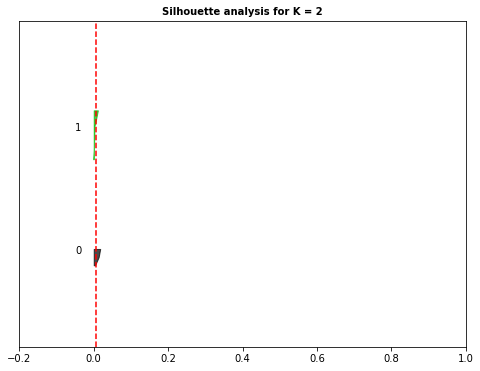

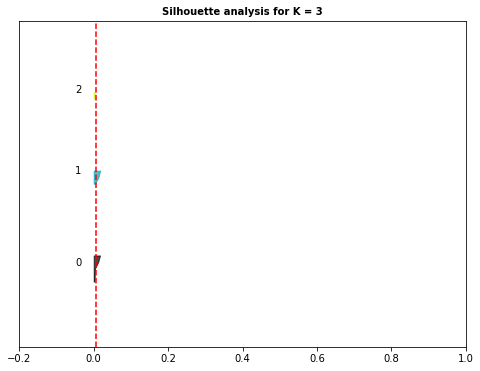

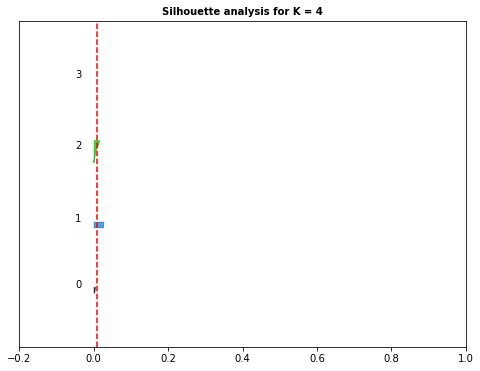

In [136]:
silhouette(kmeans_results, final_df, plot=True)

In [137]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

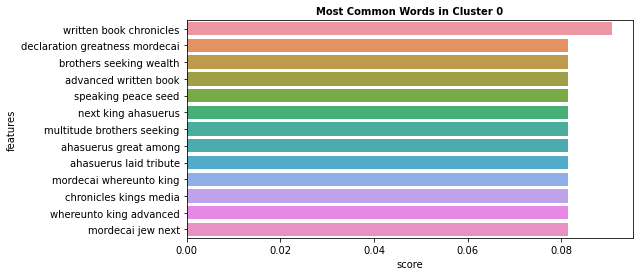

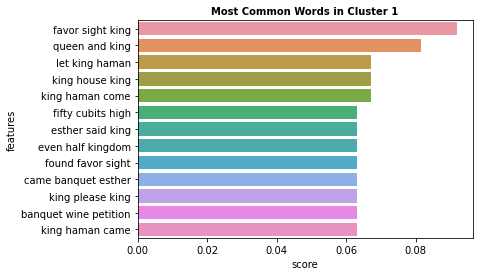

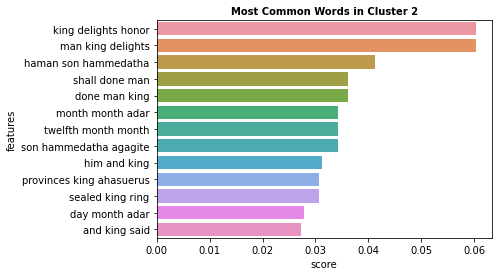

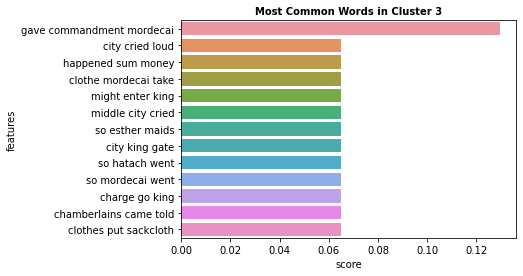

In [138]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [139]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

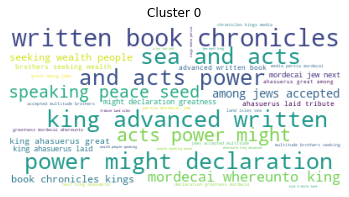

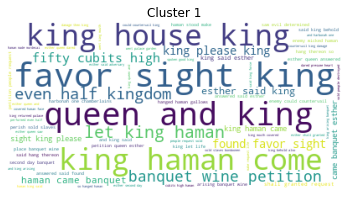

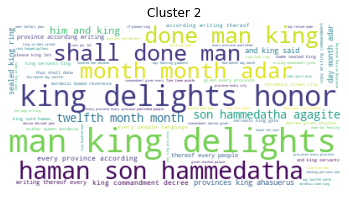

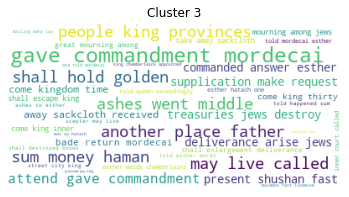

In [140]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [141]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Ester_1,"'came', 'pass', 'days', 'ahasuerus', ',', '(',...",2
101,Ester_2,"'things', ',', 'wrath', 'king', 'ahasuerus', '...",0
102,Ester_3,"'things', 'king', 'ahasuerus', 'promote', 'ham...",2
103,Ester_4,"'mordecai', 'perceived', 'done', ',', 'mordeca...",3
104,Ester_5,"'came', 'pass', 'third', 'day', ',', 'esther',...",1


In [142]:
print(df)

        Autor                                              Livro  label
100   Ester_1  'came', 'pass', 'days', 'ahasuerus', ',', '(',...      2
101   Ester_2  'things', ',', 'wrath', 'king', 'ahasuerus', '...      0
102   Ester_3  'things', 'king', 'ahasuerus', 'promote', 'ham...      2
103   Ester_4  'mordecai', 'perceived', 'done', ',', 'mordeca...      3
104   Ester_5  'came', 'pass', 'third', 'day', ',', 'esther',...      1
105   Ester_6  'night', 'could', 'king', 'sleep', ',', 'comma...      2
106   Ester_7  'king', 'haman', 'came', 'banquet', 'esther', ...      1
107   Ester_8  'day', 'king', 'ahasuerus', 'give', 'house', '...      2
108   Ester_9  'twelfth', 'month', ',', ',', 'month', 'adar',...      2
109  Ester_10  'king', 'ahasuerus', 'laid', 'tribute', 'land'...      0
